# Lecture 1 - Basic Python and Sentiment Analysis

In this notebook we will learn the basics for analyzing  social media data with Python and do some AI-assisted sentiment analysis of tweets.

Below is the overview of this notebook.
<ol type = 1>
<li> Basic tweet analysis
  <li> Measure tweet sentiment using AI </li>
   <li> Measure more complex tweet text properties</li>
</ol>

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.



# Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/genAI_social_media

import os
os.chdir("genAI_social_media")

Cloning into 'genAI_social_media'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 86 (delta 19), reused 76 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 23.30 MiB | 19.67 MiB/s, done.
Resolving deltas: 100% (19/19), done.


## Install Requirements



In [2]:
!pip install -q -r requirements.txt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.8/754.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.7/485.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 13.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networ

## Import packages

We import the packages we are going to use.  A package contains several useful functions that make our life easier.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codecs  #this let's us display tweets properly (emojis, etc.)
import textwrap as tr
from tqdm import tqdm  #progress bar for for loops
from IPython.display import HTML
import json
import textwrap
import plotly.express as px
from sklearn.decomposition import PCA

from scripts.genai import GenAI
#this option makes it so tweets display nicely in a dataframe
pd.set_option("display.max_colwidth", None)

#this code sets the font sizes for plots
plt.rcParams.update({'axes.labelsize': 18,
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})



## OpenAI API Key

You will need to input your OpenAI API key.  

1.  First you need to create an account with OpenAI here: https://auth0.openai.com/u/signup?state=hKFo2SBWS3JUVEdmQmdzZXo5ckhpY3R5NEFlc2NPWWc3WHhvRqFur3VuaXZlcnNhbC1sb2dpbqN0aWTZIG9kTDB4LV83aEdnN3pRU3VUYnVZemlnZkFURFo2RDhno2NpZNkgRFJpdnNubTJNdTQyVDNLT3BxZHR3QjNOWXZpSFl6d0Q

2. Once you have an account, copy your API key from here: https://beta.openai.com/account/api-keys

3. Input your API key by clicking the secrets icon (the key) on the left menu.  Then add a new secret called OPENAI_API_KEY and paste your key in the value box

4. Run the code below to import your key


In [4]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
OPENAI_API_KEY = OPENAI_API_KEY.strip()


## Connect to ChatGPT

Run this cell to connect to the OpenAI API using the GenAI package provided in the GitHub repository.

In [5]:
# Initialize GenAI
jarvis = GenAI(OPENAI_API_KEY)

text = "Who are you?"
instructions = "You are a helpful assistant."
response = jarvis.generate_text(text, instructions)
print(f"Human:{text}\nAI:{response}")

Human:Who are you?
AI:I am an AI language model created by OpenAI, designed to assist with information and answer questions across a wide range of topics. How can I help you today?


# User Tweets

The tweets here were collected from the Twitter timelines of a set of users. They are stored in the csv file `'data/TwExportly/TwExportly_elonmusk_tweets_2025_01_23.csv'`

### Load User Tweets

We can load the user tweets with the `pd.read_csv` function into a dataframe called `df`.

In [21]:
#filename of csv file
fname = 'data/TwExportly/TwExportly_elonmusk_tweets_2025_01_23.csv'
df = pd.read_csv(fname)




### Look at the tweets using head() function
After we load the tweets in `df`, we look at the first few tweets using the `head` function.  We can specify how many rows to show using the `n` parameter.

In [22]:
df.head(n=2)

,tweet_id,text,language,type,bookmark_count,favorite_count,retweet_count,reply_count,view_count,created_at,client,hashtags,urls,media_type,media_urls
0,'1882512309446438998',@Kyantweets Yikes 😂,en,Reply,6,365,29,113,6799,2025-01-23 14:34:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN
1,'1882466756687491400',"RT @MarioNawfal: 🚨🇺🇸 TRUMP: IT’S OFFICIAL POLICY—THERE ARE ONLY TWO GENDERS, MEN AND WOMEN\n\n""I’ve made it an official policy of the United States that there are only two genders, male and female. We will have no men participating in women’s sports, and transgender operations, which became the rage, will occur very rarely.”\n\nSource: @TrumpWarRoom",en,Retweet,386,13931,2103,1479,2321202,2025-01-23 11:33:43,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,video,https://video.twimg.com/ext_tw_video/1882466581948592136/pu/vid/avc1/640x360/oyAPhZR7WS8g6-_n.mp4?tag=12


### Count Rows in Dataframe

We can use the `len` function to find out how many rows a dataframe has.  Let's find out how many tweets contain our keyword, and then print out the result. We can use the column we just created for this to make the code cleaner.

In [28]:
# prompt: print how many rows in df

print(f"The number of rows in the dataframe is: {len(df)}")

The number of rows in the dataframe is: 1000


### Select Columns of Dataframe

Sometimes we just want to look at a few columns of the dataframe.  We can do this by putting the names of the columns we want into a *list*.  In Python, lists have the format `[item_1,item_2,...,item_n]`.

In [29]:
# prompt: print only the retweet_count and text cols of df

df[['retweet_count', 'text']]

,retweet_count,text
0,72,@TheChiefNerd True
1,46,@imPenny2x Coming soon
2,34,@damonimani 😂
3,42,@Teslaconomics Thanks 😂
4,0,Today's @StateFarm Player Of The Game was an easy choice ... Congrats @jaxon_smith1 🫡 #ad https://t.co/Ltq7r7nzkP
...,...,...
995,177,@jordanbpeterson @cafreeland @JustinTrudeau @theJagmeetSingh !
996,488,@TexasLindsay_ Precisely
997,117,@dvorahfr 😂🎯
998,1328,"Conversation about this year’s Oscar nominees is surging on X, with +120% more posts and +326% more video views than last year. There have already been over 1.2 billion impressions on Oscars content so far this year."


### Sort Rows By Column Values
We can sort a dataframe's rows by the values in a column with the `sort_value` function.  It takes as input a list of columns, and an optional parameter `ascending` which can be `True` or `False`.

Let's sort the tweets in order of decreasing `retweet_count`.

In [32]:
# prompt: sort df by retweet_count, highest to lowest, and print top tweets retweet_count and text

df_sorted = df.sort_values(by='retweet_count', ascending=False)
display(df_sorted[['retweet_count', 'text']].head())

,retweet_count,text
305,87039,https://t.co/OAky3fBywu
96,85150,Watching it now
298,81336,You are being gaslit
934,79490,That is undeniable at this point
470,69719,"A few other things you probably don’t know: illegals in America can get bank loans, mortgages, insurance, driver’s licenses, free healthcare (California & New York) and in-state college tuition.\n\nWhat’s the point of being a citizen if an illegal gets all the benefits, but doesn’t pay taxes or do jury duty?"


### Search for Tweets Containing Keywords

We can search for tweets in the dataframe which contains a specific keyword.  We do this with the `contains` function.  This function takes the keyword as input in the form of a string (this means you put the word inside quotes).  It also has a parameter `case` which is `True` if you want to match the case of the keyword.

In [33]:
 keyword = 'AI'
 df[df['text'].str.contains(keyword, case=True)]['text']

,text
85,"The #QuantumAI market size will exceed US$1.8 bn by 2030. We are on the verge of a quantum leap, and these technologies can revolutionize the future. Witness the quantum-AI frontier with tech titans and #AI experts at #FIIPRIORITY #Miami. https://t.co/aSKJZkgDFC"
97,"Tweet #BetterBowl to unlock the power of AI to build a better bowl in a snap. Introducing GuacAImole, the AI powered recipe generator that can make any bowl a better bowl with Avocados From Mexico"
228,"By 2025, 97 million people will work in a $200 billion #AI industry! Generative AI is no longer on the horizon; it has arrived and is transforming everything rapidly! Read our latest impact report on #AI, a guiding light in a world where science fiction has become reality."
314,@paulg A “non-profit” like OpenAI
349,"Tweet #BetterBowl to unlock infinite Guac-abilities with GuacAImole, the AI powered recipe generator that can make any bowl a better bowl with Avocados from Mexico!"
387,"Less word count. More words that count.\n\nGet work done faster with Grammarly as your trusted AI writing partner, and turn your ideas into results. 🙌 https://t.co/Hwe9uZ8o4H"
507,"Here is the video recording of my live 𝕏 spaces conversation with Jared Issacman (@rookisaacman), a billionaire business man, stunt pilot, and SpaceX mission commander. \n\nThis is my first video podcast. We discussed the space race with China, Starship, entrepreneurship, philanthropy, and his best advice if your kid want's to be an astronaut.\n\nTimestamps: \n1:22 - What was it like to be little Jared\n7:53 - ""Ghost Squadron"" air show team\n10:14 - Raising money for St. Jude\n16:36 - Fly on the wall at SpaceX\n18:33 - Being unselfish\n21:30 - Polaris program and Starship\n27:51 - Risk vs reward riding rockets\n33:50 - Repairing Hubble and commercial space\n40:50 - The Space race and SpaceX\n45:00 - Landing on Mars and the Moon\n50:15 - AI and Robotics (Optimus)\n54:12 - How to become an astronaut\n57:30 - Listener questions\n\nKindly repost, and comment with feedback. <3"
575,"“Reality is the intersubjective layer.”\n\nIn this video, Alix and @broodsugar discuss the definition of #AR (Augmented Reality) and why these words are often misused. 📲\n\nWatch the full conversation here: https://t.co/g6RXoPZccr\n\n #AI #XR #spatialcomputing #posemesh #Apple #visionpro"
946,xAI is not raising capital and I have had no conversations with anyone in this regard


### Add Column to Dataframe

We can add a column to the dataframe to make data analysis easier.  Let's add a column called `"has_keyword"` which is `True` if the tweet has the word "eminem".  This can be done by doing `df["has_keyword"] = column you want to add`.  In our case, the column we want to add is given by `df.text.str.contains(keyword, case = False)`.

In [34]:
keyword = 'AI'
ind = df.text.str.contains(keyword, case = True)
df['has_keyword'] = ind
cols = ['has_keyword','text']

df[cols].head()

,has_keyword,text
0,False,@TheChiefNerd True
1,False,@imPenny2x Coming soon
2,False,@damonimani 😂
3,False,@Teslaconomics Thanks 😂
4,False,Today's @StateFarm Player Of The Game was an easy choice ... Congrats @jaxon_smith1 🫡 #ad https://t.co/Ltq7r7nzkP


## Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  If you want to summarize all the statistics, use the `describe` function.  We do this for the `retweet_count` column.

In [35]:
df.groupby('has_keyword')['retweet_count'].describe()


,count,mean,std,min,25%,50%,75%,max
has_keyword,,,,,,,,
False,991.0,3550.339051,11168.439738,0.0,67.0,144.0,541.0,87039.0
True,9.0,1400.111111,3819.255243,2.0,4.0,18.0,72.0,11554.0


# Combining User Tweets

TwExportly gives us one file of tweets per user.  We want to put the tweets of all users into one big dataframe and then analyze them.  

## Put Tweets into Single DataFrame

We need to combine all the TwExportly files into a single dataframe, and also add a `"screen_name"` column so we know whose tweets they are.  The screen name is in the middle of the filename.  This is tricky.  We can do this easily if we give the AI the correct prompt.

In [36]:
# prompt: the files in the folder data/TwExportly have format
#TwExportly_<screen_name>_....  write code to go through these
#files and print out each ones screen_name, and also load the
#fiel inte a dataframe and then concateneate all the dataframes
#into one big one called df. add a screen_name column to the
#dataframe with each screen_name. display the head of df jsut
#screen_name and text cols

import os
import pandas as pd

# Assuming 'data/TwExportly' is in the current working directory
folder_path = 'data/TwExportly'
all_files = os.listdir(folder_path)

df_list = []

for filename in all_files:
    if filename.startswith("TwExportly_"):
        screen_name = filename.split("_")[1]
        print(f"Screen Name: {screen_name}")
        file_path = os.path.join(folder_path, filename)
        try:
            temp_df = pd.read_csv(file_path)
            temp_df['screen_name'] = screen_name  # Add screen_name column
            df_list.append(temp_df)
        except pd.errors.EmptyDataError:
            print(f"Warning: {filename} is empty. Skipping.")
        except pd.errors.ParserError:
            print(f"Warning: Could not parse {filename}. Skipping")


if df_list:
    df = pd.concat(df_list, ignore_index=True)
    display(df[['screen_name', 'text']].head())
else:
    print("No valid data files found in the specified directory.")

Screen Name: openai
Screen Name: RobertKennedyJr
Screen Name: sama
Screen Name: PeteHegseth
Screen Name: elonmusk
Screen Name: beyonce
Screen Name: MadameWeb
Screen Name: dunemovie
Screen Name: elonmusk
Screen Name: joebiden
Screen Name: mrbeast
Screen Name: RealAlexJones
Screen Name: deepseek
Screen Name: mkbhd
Screen Name: 1future
Screen Name: aoc
Screen Name: yale
Screen Name: kamalaharris
Screen Name: zlisto
Screen Name: AmericanAir
Screen Name: kingjames
Screen Name: Cobratate
Screen Name: potus
Screen Name: StephenCurry30


,screen_name,text
0,openai,"Some good news for the EU, Norway, Iceland, Liechtenstein, and Switzerland—\n\nYou now have video and screensharing in Advanced Voice in the ChatGPT mobile app."
1,openai,"RT @kevinweil: 📢 Today we're announcing ChatGPT Gov, a version of ChatGPT that government agencies can deploy in their own MS Azure commercial or government cloud environment.\n\nEnabling the public sector, especially the U.S. Federal government, to leverage ChatGPT is critical to maintaining America’s global leadership in AI. We see enormous potential for these tools to support the public sector in tackling complex challenges—from improving public health and infrastructure to strengthening national security 🇺🇸"
2,openai,Canvas update: today we’re rolling out a few highly-requested updates to canvas in ChatGPT.\n\n✅Canvas now works with OpenAI o1—Select o1 from the model picker and use the toolbox icon or the “/canvas” command\n\n✅Canvas can render HTML &amp; React code
3,openai,✅We’ve also fully rolled out canvas on the ChatGPT desktop app for macOS to all tiers.
4,openai,"Canvas with o1 is available to Pro, Plus, and Team users.\n\nReact/HTML code rendering is available to Pro, Plus, Team, and Free users.\n\nBoth updates will roll out to Enterprise and Edu in a couple weeks."


## Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  We do this for the `retweet_count` column.

In [37]:
df.groupby('screen_name')['retweet_count'].mean()



,retweet_count
screen_name,
1future,3818.878218
AmericanAir,0.257778
Cobratate,1287.417339
MadameWeb,254.675676
PeteHegseth,5318.081633
RealAlexJones,2173.791375
RobertKennedyJr,6103.780754
StephenCurry30,1833.248039
aoc,3782.842829


## Barplot Retweet Count of Groups

We can make a bar graph of the retweet count of the users.  To make the plot, we use the `barplot` function in the *seaborn* package.  Details on the seaborn package can be found here: https://seaborn.pydata.org/#

To use `barplot`, we need to input the `data`, which is the dataframe, `x`, which is the name of the column for the x-axis, and `y`, which is the name of the column for the y-axis.  There are many other functions that let us edit the plot to make it look nice.  These are from the *matplotlib* package.  One parameter is the `color` parameter.  A complete list of colors is found here: https://matplotlib.org/stable/gallery/color/named_colors.html

We can make a barplot of a column value on the y-axis, and the group on the x-axis.  Seaborn knows to group together tweets in the same group, and plot the mean value along with error bars. In this case, we will plot `retweet_count` on the y-axis, and the groups are the `screen_name` column.

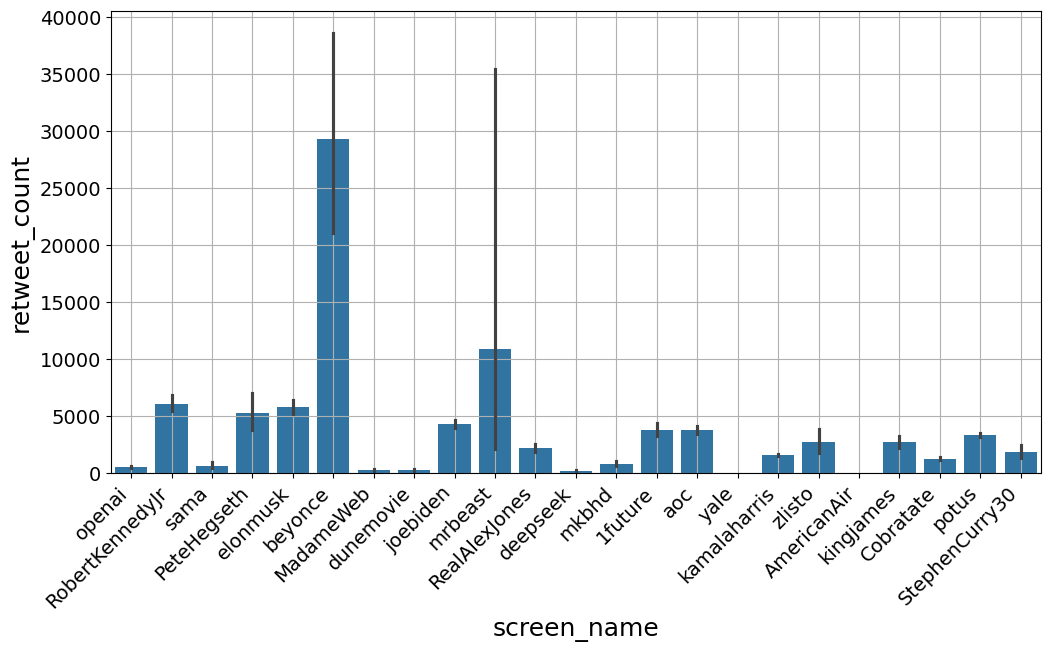

In [38]:
''' prompt: We can make a barplot of a column value on the
y-axis, and the group on the x-axis. Seaborn knows to group
together tweets in the same group, and plot the mean value
along with error bars. In this case, we will plot retweet_count
on the y-axis, and the groups are the screen_name column.
'''

plt.figure(figsize = (12,6))
sns.barplot(data=df, y='retweet_count', x='screen_name')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid()
plt.show()

## Compare Retweet Count of Tweets Containing Different Keywords

We can compare the retweet count of tweets that contain a keyword versus those that do not.  We do this by defining the variable `keyword` which is the keyword we care about, and then adding a column to the dataframe called `has_keyword_{keyword}` that is `True` if the tweet has the word.  The `{keyword}` means the column name will have the actual keyword, which makes things easier to analyze.  We can then plot the retweet count grouped by screen name, and separate within the group those where `has_keyword_{keyword}` is `True` and `False`.  We use the `hue` parameter for this in-group separation.

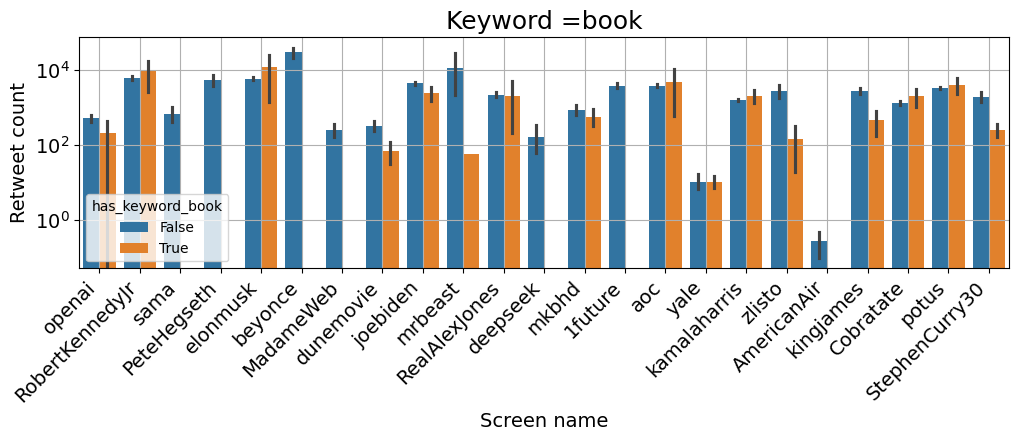

In [39]:
keyword = 'book'
ind = df.text.str.contains(keyword, case = False)
df[f'has_keyword_{keyword}'] = ind

fig = plt.figure(figsize = (12,3))
sns.barplot(data = df,
            x = 'screen_name',
            y = 'retweet_count',
            hue = f'has_keyword_{keyword}')
plt.xlabel('Screen name',fontsize  = 14)
plt.ylabel('Retweet count',fontsize  = 14)
plt.title(f"Keyword ={keyword}",fontsize = 18)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')

plt.grid()
plt.show()

# Measuring Sentiment with ChatGPT

We will use ChatGPT to measure the sentiment of some tweets

In [40]:
instructions_sentiment = '''Give the sentiment of this
tweet on a scale of 0 to 100, 0 being very
negative and 100 being very positive.
Return only the number. '''



## Example tweets

We make a list `texts` that has some example tweets for testing out the AI sentiment classifier.  Feel free to add anything  you want to this list.

In [41]:
texts = ["This class is awesome",
        "this class is stupid",
         "This class is kinda boring, but informative",
       "this class is :(",
       "this class is :)"]

## Measure sentiment

We use a for loop to go through all the tweets, measure their sentiment, and then print out the sentiment score and tweet text.  We will also use a progress bar to see how long it will take with the `tqdm` package.

In [42]:
# prompt: go through the text in the list texts and measure their sentiment with the jarvis.generate_text functin and print out sentimet and text.  add a tqdm progress bar to the for loop


for text in tqdm(texts):
  try:
    response = jarvis.generate_text(text, instructions_sentiment)
    sentiment = int(response)
    print(f"Sentiment: {sentiment}, Text: {text}")
  except Exception as e:
    print(f"Error with {text}\nError:{e}")

 20%|██        | 1/5 [00:00<00:02,  1.78it/s]

Sentiment: 100, Text: This class is awesome


 40%|████      | 2/5 [00:03<00:05,  1.67s/it]

Sentiment: 10, Text: this class is stupid


 60%|██████    | 3/5 [00:03<00:02,  1.29s/it]

Sentiment: 60, Text: This class is kinda boring, but informative


 80%|████████  | 4/5 [00:04<00:00,  1.01it/s]

Sentiment: 20, Text: this class is :(


100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

Sentiment: 85, Text: this class is :)


# Measuring Real Tweet Sentiment

## Load Tweets

Pick one of the files in the data/TwExportly folder to analyze

In [44]:
#filename of csv file
fname = 'data/TwExportly/TwExportly_elonmusk_tweets_2025_01_23.csv'
df = pd.read_csv(fname)
print(f"Number of tweets: {len(df)}")
df[['tweet_id','text']].sample(n=5) #print out a random sample of 5 tweets

Number of tweets: 1004


,tweet_id,text
691,'1880025578398720330',https://t.co/oKS3LG8JLH
825,'1879786451098845518',"[keeps going]\nAs the sun sets behind our restored crenellations (the restoration supervised by three different historical preservation consultants), I can't help but feel that Musk could learn much from my own example of modest, understated wealth. Now, if you'll excuse me, our chef has prepared a tasting menu themed around ""The Digital Proletariat,"" and I believe the peasant bread course (made with heritage wheat grown in our medieval-authentic fields) is about to be served.\n\nNamaste, of course. Though these days, one must be so careful about cultural appropriation, as our diversity consultant (Harvard, naturally) regularly reminds our household staff during their mandatory sensitivity training sessions."
505,'1880833673664319891',@HansCNelson @jamesdouma @farzyness Interesting
26,'1882389331912102252',RT @ada_lluch: Milei did it again.\n\nHe went to the WEF to tell them to go fuck themselves basically. \n\nIt was beautiful to watch.\n\nhttps://t.co/hbTNuMv2Aw
346,'1881520634343387474',@GadSaad @AOC AOC has reached Stage 5 TDS – fully unhinged 🤣🤣


## Choose a Tweet and Measure Sentiment

Choose a tweet by its `tweet_id` and then use the AI to measure its sentiment.  One thing to keep in mind here, the tweet_id in `df` includes the starting and ending apostrophes, so you need to include those, i.e.  `tweet_id = "'1881705898407764084'"`.

In [45]:
tweet_id = "'1881705898407764084'"
text = df[df['tweet_id']==tweet_id]['text'].iloc[0]
response = jarvis.generate_text(text, instructions_sentiment)
sentiment = int(response)
print(f"Sentiment: {sentiment}, Text: {text}")

Sentiment: 30, Text: This is about fairness: it’s not fair that most people have to come to work to build products or provide services while Federal Government employees get to stay home


# More Complex Sentiments

Now we will try some more complex types of sentiment from the tweets.

## Load Tweets

We will load the tweets, but only use a sample of them for this analysis, just to save time.

In [46]:
#filename of csv file
fname = 'data/TwExportly/TwExportly_elonmusk_tweets_2025_01_23.csv'
df = pd.read_csv(fname)
print(f"Number of tweets: {len(df)}")

#keep only last 10 rows
df = df.tail(10)
print(f"Number of tweets: {len(df)}")

Number of tweets: 1004
Number of tweets: 10


## Choose a complex sentiment measure

In `instructions_sentiment_complex` tell the AI what kind of sentiment you want it to measure.  Also tell it to format it as a JSON object (this is a dictionary with keys and values) and tell it what the keys should be.  If you start and end your string with 3 apostrophes, you can have it take up multiple lines.  This is useful for longer strings, like complex instructions for the AI.

In [47]:
instructions_sentiment_complex = '''Measure the following
properties of the given tweet:
joy, sadness, anger, fear, disgust,
anxiety, envy, embarassment, ennui
(all 0 to 100).
Return asnswer as JSON with format:
{
  'joy'<joy>,
  'anger'<anger>,
  'sadness'<sadness>,
  'fear'<fear>,
  'disgust'<disgust>,
  'anxiety'<anxiety>,
  'envy'<envy>,
  'ennui'<ennui>,
}
'''

## Test on a sample text

In [16]:
text = '''Im so stressed about recruiting.
My friends all have offers and Im still struggling
to get an interview.'''
sentiment = jarvis.generate_text(text,
                    instructions_sentiment_complex,
                    output_type = 'json_object')
sentiment_json = json.loads(sentiment)
sentiment_json

{'joy': 10,
 'anger': 15,
 'sadness': 60,
 'fear': 50,
 'disgust': 5,
 'anxiety': 80,
 'envy': 70,
 'ennui': 30}

## Measure complex sentiment of tweets

Now we will compute the complex sentitment of the sample of tweets we have in `df`. After we compute the sentiment, we will put it in a dataframe `df_sentiment` with one column for each sentiment type.  Then we will concatenate `df` and `df_sentiment` so we have all the data in one dataframe.

In [17]:
%%time
sentiments = []
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Sentiment", unit="row"):
  try:
    sentiment = jarvis.generate_text(row.text,
                  instructions_sentiment_complex,
                  output_type = 'json_object')
    sentiment_json = json.loads(sentiment)
  except:
    sentiment = None  #if there is an error, set sentiment to 0
  sentiments.append(sentiment_json)  #append sentiment of tweet to Sentiment list

df_sentiment = pd.DataFrame(sentiments)  #add sentiment column to dataframe of tweets
df_sentiment = df_sentiment.reset_index(drop=True)


Processing Sentiment: 100%|██████████| 10/10 [00:16<00:00,  1.67s/row]

CPU times: user 123 ms, sys: 19.2 ms, total: 142 ms
Wall time: 16.7 s


## Bar Plot of Mean Sentiment

You can make a bar plot showing the mean of each type of sentiment.  Just make sure you have the proper column names.

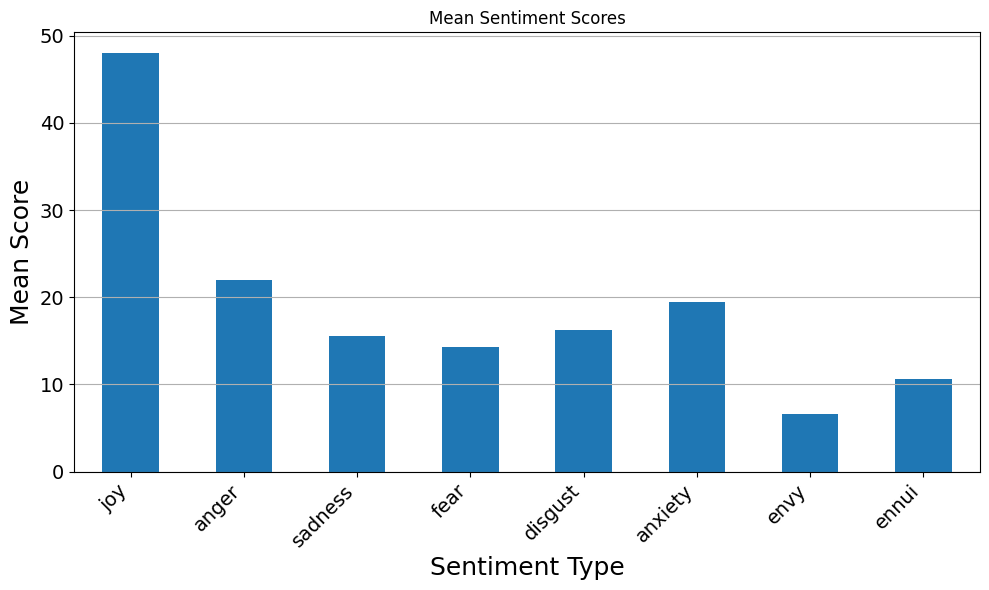

In [20]:
# prompt: df_sentiment has cols joy	anger	sadness	fear	disgust	anxiety	envy	ennui, make a bar graph with the mean value for each col

# Calculate the mean for each sentiment column
mean_sentiments = df_sentiment[['joy', 'anger', 'sadness', 'fear', 'disgust', 'anxiety', 'envy', 'ennui']].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_sentiments.plot(kind='bar')
plt.title('Mean Sentiment Scores')
plt.xlabel('Sentiment Type')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# User Analysis

Now we will feed all the tweets to the AI at once and build a behavioral profile of the user.

In [48]:
fname = "data/TwExportly/TwExportly_elonmusk_tweets_2024_02_10.csv"
df = pd.read_csv(fname)


print(f"Number of tweets: {len(df)}")

Number of tweets: 1000


## Convert tweets into a single string

In [22]:
# prompt: put all the string in df['text'] into a single string wiht format "Tweet:<text>\n" and call the string tweets_str

tweets_str = ""
for text in df['text']:
  tweets_str += f"Tweet:{text}\n"
nwords = len(tweets_str.split())
print(f"Number of words in combined tweets: {nwords}")

Number of words in combined tweets: 10180


## Build behavioral profile

`instructions_profile` tells the AI how to build the behavioral profile.  To make it easy to read, you can have it return an HTML table.

In [23]:
instructions_profile = ''' You will be given the tweets
of a user.  Read them, and then build a behavioral profile
for them with the following features:
  joy, sadness, anger, fear, disgust,
  anxiety, envy, embarassment, ennui (all 0 to 100).
  Return asnswer as an HTML table, with columns
  Feature, Score, Reason.
  Score = avg score for feature based on tweets,
  Reason = reason for the score.
  '''

response_html = jarvis.generate_text(tweets_str,instructions_profile)
HTML(response_html)

Feature,Score,Reason
Joy,78,"The user frequently expresses joy through laughter emojis (😂🤣) and positive reactions to various events, including sports achievements and product launches."
Sadness,51,"There are indications of sadness especially in response to discussions about societal issues, such as immigration and mental health, as well as some posts reflecting personal struggles."
Anger,66,"The user expresses significant anger regarding political and social issues such as illegal immigration, perceived injustices in systems, and dissatisfaction with certain public figures."
Fear,44,"Some tweets convey a sense of fear regarding the future, particularly about increasing illegal immigration and its potential impact on society."
Disgust,67,"Disgust is noted especially in reaction to perceived corruption or failures of politicians and organizations, often calling out systemic flaws and criticizing actions of various entities."
Anxiety,52,"There are hints of anxiety in posts discussing social and political issues, indicating concern about current events and their implications for the future."
Envy,35,"There is little indication of envy, as most interactions seem to be supportive or involve sharing excitement rather than jealousy towards others."
Embarrassment,30,"The user expresses a moderate level of embarrassment occasionally, usually in a light-hearted context with humor."
Ennui,40,"The user seems somewhat engaged and proactive, so ennui appears less prevalent amidst more active discussions and responses."


## Radar Plot

We can make a radar plot to visualize the user's behavioral profile.  We just need to get the numbers into a dataframe we will call `df_sentiment`.

In [24]:
instructions_profile_json = ''' You will be given the tweets
of a user.  Read them, and then build a behavioral profile
for them with the following features:
  joy, sadness, anger, fear, disgust,
  anxiety, envy, embarassment, ennui (all 0 to 100).
  Return asnswer as JSON with format:
{
  'joy'<joy>,
  'anger'<anger>,
  'sadness'<sadness>,
  'fear'<fear>,
  'disgust'<disgust>,
  'anxiety'<anxiety>,
  'envy'<envy>,
  'ennui'<ennui>,
}
  '''

sentiment = jarvis.generate_text(tweets_str,
                    instructions_profile_json,
                    output_type = 'json_object')
sentiment_json = json.loads(sentiment)
df_sentiment = pd.DataFrame(sentiment_json, index=[0])
df_sentiment.head()

,joy,anger,sadness,fear,disgust,anxiety,envy,ennui
0,75,55,40,35,20,30,50,25


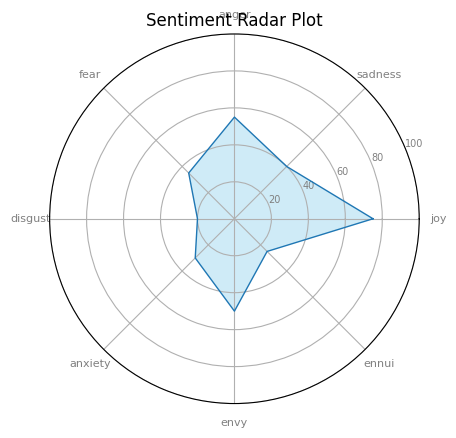

In [25]:
# prompt: df_sentiment has columns joy, sadness, anger, fear, disgust, anxiety, envy,  and ennui.  make a radar plot of these values (they range from 0 to 100).

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_sentiment is your DataFrame and it contains the specified columns.
# Check if required columns exist, handle potential errors gracefully.
required_cols = ['joy', 'sadness', 'anger', 'fear', 'disgust', 'anxiety', 'envy', 'ennui']
if all(col in df_sentiment.columns for col in required_cols):
    categories = required_cols
    values = df_sentiment.loc[0, categories].values.flatten().tolist()  # Get values for the radar plot

    # Number of variables
    N = len(categories)

    # Angles for the radar plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the circle

    # Values for the radar plot
    values += values[:1]  # Close the circle

    # Plot the radar chart
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'], color="grey", size=7)
    plt.ylim(0, 100)
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'skyblue', alpha=0.4)

    plt.title('Sentiment Radar Plot')  # Add a title
    plt.show()
else:
    print("Error: One or more required columns are missing in the DataFrame.")